In [1]:
import pandas as pd
from google.colab import files

# Step 1: Upload the file
uploaded = files.upload()

file_name = 'mydata.csv'
data = pd.read_csv(file_name)

Saving mydata.csv to mydata.csv


In [2]:
# 1. Percentage of Tweets Flagged for Each Category
category_totals = data.iloc[:, 3:10].sum()
category_percentages = (category_totals / len(data)) * 100

# 2. Percentage of Sarcastic Tweets
sarcastic_percentage = (data['sarcastic'].sum() / len(data)) * 100

# 3. Category-wise Sarcastic and Non-Sarcastic Distribution
sarcasm_distribution = data.groupby('sarcastic').sum().iloc[:, 2:9]
sarcasm_percentage = sarcasm_distribution.div(sarcasm_distribution.sum(axis=1), axis=0) * 100

# 4. Dissatisfaction Score (Optional, weighted sum)
# Assign weights to categories based on importance (all equal for now)
weights = [1] * 7  # Adjust weights based on priority
data['Dissatisfaction Score'] = data.iloc[:, 3:10].dot(weights)

# Display calculated metrics
print("Category Percentages:\n", category_percentages)
print("\nSarcastic Tweet Percentage:", sarcastic_percentage)
print("\nSarcasm Distribution:\n", sarcasm_distribution)
print("\nSarcasm Percentage by Category:\n", sarcasm_percentage)

Category Percentages:
 Facilities & Amenities        7.776698
Punctuality & Reliability    50.659962
Customer Experience          20.335981
Accessibility                 1.274213
Communication                11.776470
Complaint Handling            6.645335
Value for Money               1.531341
dtype: float64

Sarcastic Tweet Percentage: 14.227758413804924

Sarcasm Distribution:
            Facilities & Amenities  Punctuality & Reliability  \
sarcastic                                                      
0                            1074                       7733   
1                             287                       1133   

           Customer Experience  Accessibility  Communication  \
sarcastic                                                      
0                         3061            197           1702   
1                          498             26            359   

           Complaint Handling  Value for Money  
sarcastic                                       
0    

Percentage of users unhappy with each category:
Facilities & Amenities        7.776698
Punctuality & Reliability    50.659962
Customer Experience          20.335981
Accessibility                 1.274213
Communication                11.776470
Complaint Handling            6.645335
Value for Money               1.531341
dtype: float64


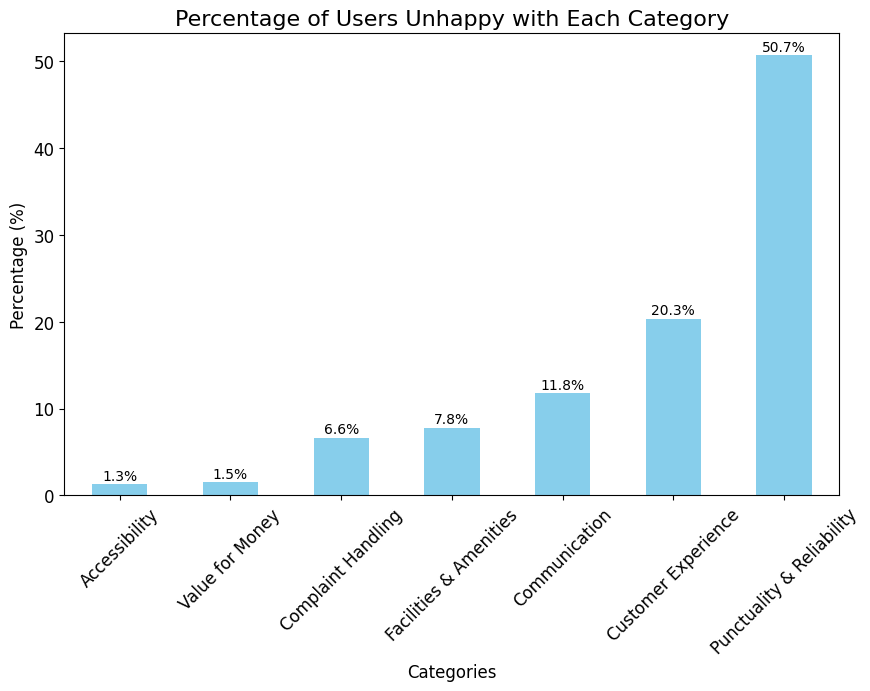

In [10]:
# Calculate total tweets flagged for each category
category_totals = data.iloc[:, 3:10].sum()
category_percentages = (category_totals / len(data)) * 100

# Display results
print("Percentage of users unhappy with each category:")
print(category_percentages)

# Visualization: Bar Chart with Numbers
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = category_percentages.sort_values().plot(kind='bar', color='skyblue', fontsize=12)

# Adding numbers on top of bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,  # Center the text
             bar.get_height() + 0.5,            # Position above bar
             f'{bar.get_height():.1f}%',       # Format as percentage
             ha='center', fontsize=10)

plt.title('Percentage of Users Unhappy with Each Category', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


Number of Users Unhappy with Each Category:
Facilities & Amenities       1361
Punctuality & Reliability    8866
Customer Experience          3559
Accessibility                 223
Communication                2061
Complaint Handling           1163
Value for Money               268
dtype: int64


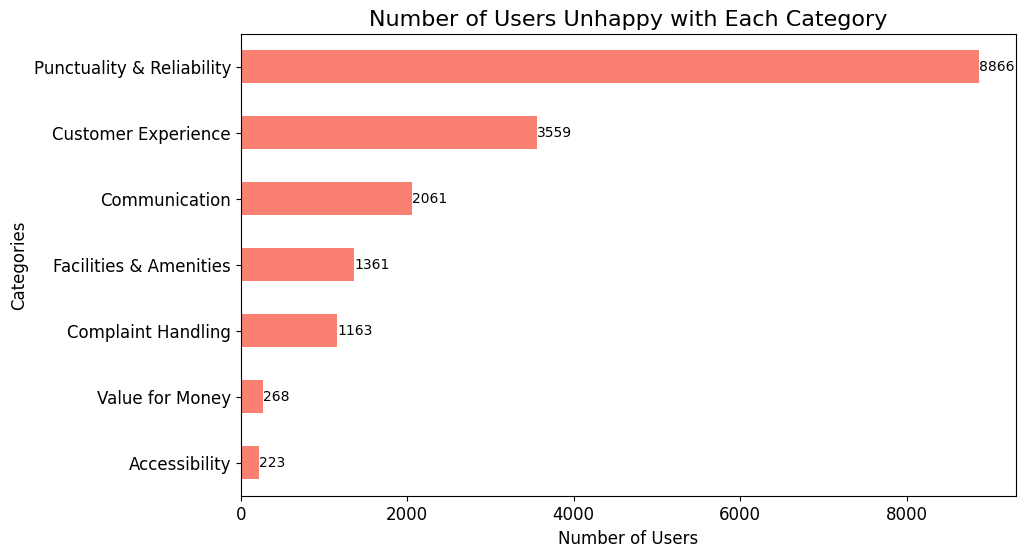

In [11]:
# Total tweets flagged per category
unhappy_users = category_totals

# Display metrics
print("Number of Users Unhappy with Each Category:")
print(unhappy_users)

# Visualization: Horizontal Bar Chart with Numbers
plt.figure(figsize=(10, 6))
bars = unhappy_users.sort_values().plot(kind='barh', color='salmon', fontsize=12)

# Adding numbers at the end of bars
for bar in bars.patches:
    plt.text(bar.get_width() + 1,               # Position after the bar
             bar.get_y() + bar.get_height() / 2, # Center vertically
             f'{int(bar.get_width())}',         # Convert to integer
             va='center', fontsize=10)

plt.title('Number of Users Unhappy with Each Category', fontsize=16)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('Categories', fontsize=12)
plt.show()


Top 3 Most Flagged Categories:
Punctuality & Reliability    8866
Customer Experience          3559
Communication                2061
dtype: int64


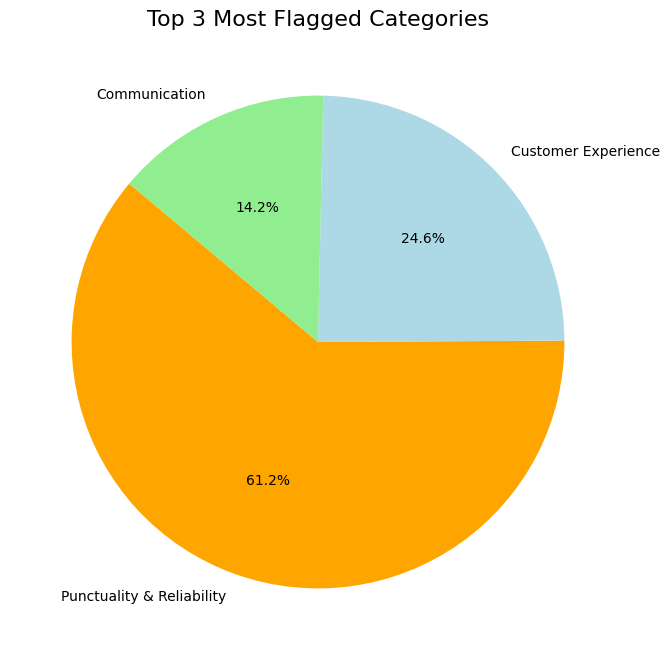

In [12]:
# Find the top 3 flagged categories
top_categories = category_totals.sort_values(ascending=False).head(3)

# Display results
print("Top 3 Most Flagged Categories:")
print(top_categories)

# Visualization: Pie Chart
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue', 'lightgreen'])
plt.title('Top 3 Most Flagged Categories', fontsize=16)
plt.ylabel('')  # Hide y-axis label for pie chart
plt.show()

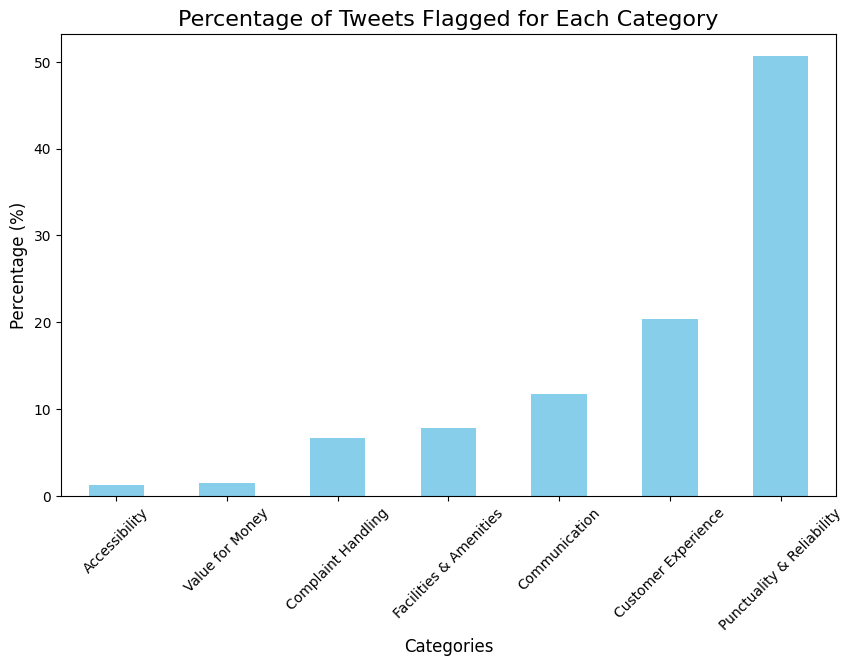

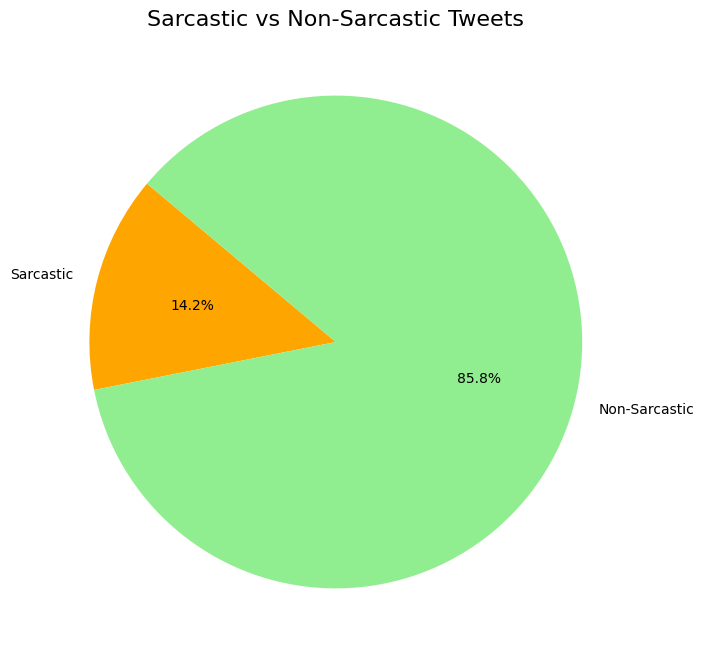

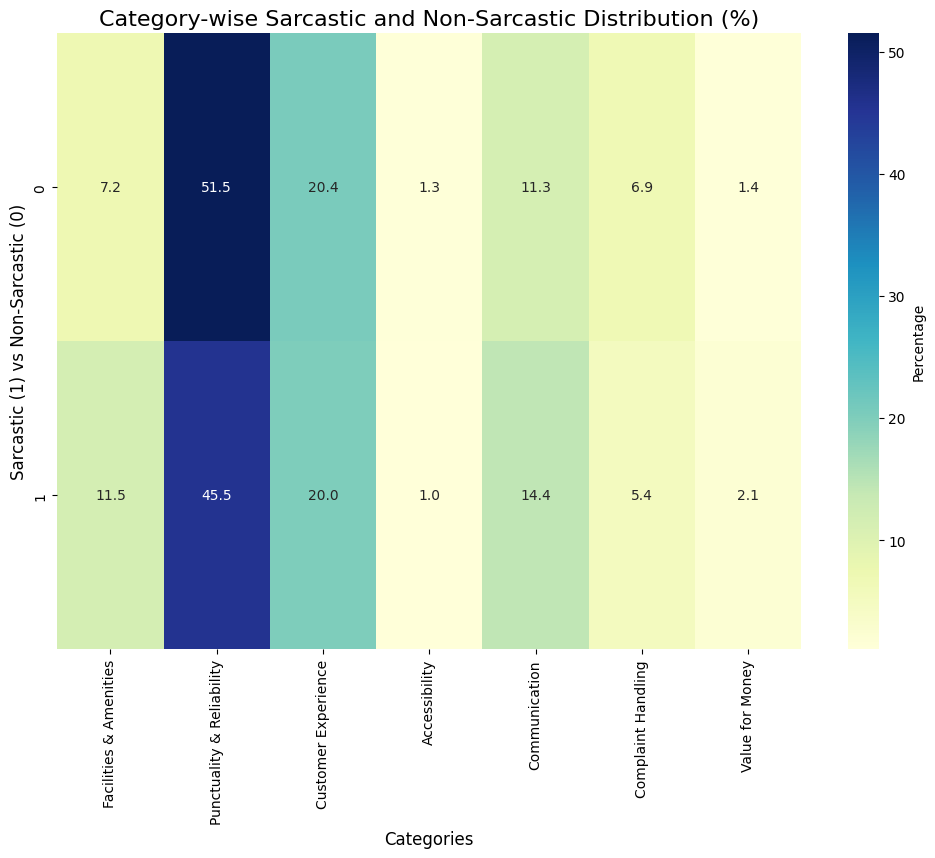

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Percentage of Tweets Flagged for Each Category
plt.figure(figsize=(10, 6))
category_percentages.sort_values().plot(kind='bar', color='skyblue')
plt.title('Percentage of Tweets Flagged for Each Category', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Pie Chart: Sarcastic vs Non-Sarcastic Tweets
plt.figure(figsize=(8, 8))
plt.pie([sarcastic_percentage, 100 - sarcastic_percentage],
        labels=['Sarcastic', 'Non-Sarcastic'], autopct='%1.1f%%',
        startangle=140, colors=['orange', 'lightgreen'])
plt.title('Sarcastic vs Non-Sarcastic Tweets', fontsize=16)
plt.show()

# Heatmap: Sarcastic and Non-Sarcastic Distribution by Category
plt.figure(figsize=(12, 8))
sns.heatmap(sarcasm_percentage, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Percentage'})
plt.title('Category-wise Sarcastic and Non-Sarcastic Distribution (%)', fontsize=16)
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Sarcastic (1) vs Non-Sarcastic (0)', fontsize=12)
plt.show()

Total Availability Flags: 8866
Sarcastic Availability Flags: 1133
Sarcastic Percentage for Availability: 12.78%


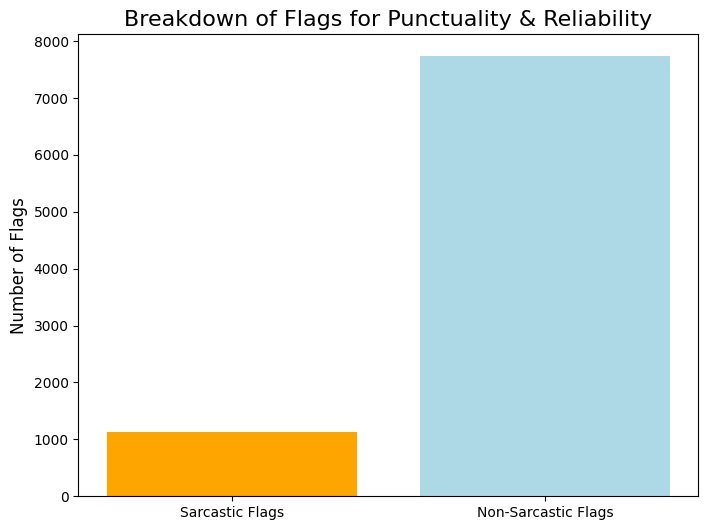

In [5]:
# Punctuality & Reliability Flags
availability_flags = data['Punctuality & Reliability'].sum()

# Sarcastic Tweets about Availability
sarcastic_availability = data[data['sarcastic'] == 1]['Punctuality & Reliability'].sum()

# Non-Sarcastic Tweets about Availability
non_sarcastic_availability = availability_flags - sarcastic_availability

# Sarcastic Percentage for Availability
availability_sarcastic_percentage = (sarcastic_availability / availability_flags) * 100

print("Total Availability Flags:", availability_flags)
print("Sarcastic Availability Flags:", sarcastic_availability)
print("Sarcastic Percentage for Availability: {:.2f}%".format(availability_sarcastic_percentage))

# Visualization: Bar Chart for Sarcastic vs Non-Sarcastic Flags
import matplotlib.pyplot as plt

availability_data = {
    'Sarcastic Flags': sarcastic_availability,
    'Non-Sarcastic Flags': non_sarcastic_availability
}

plt.figure(figsize=(8, 6))
plt.bar(availability_data.keys(), availability_data.values(), color=['orange', 'lightblue'])
plt.title('Breakdown of Flags for Punctuality & Reliability', fontsize=16)
plt.ylabel('Number of Flags', fontsize=12)
plt.show()

Correlation with Punctuality & Reliability:
 Punctuality & Reliability    1.000000
Accessibility               -0.115117
Value for Money             -0.126363
Complaint Handling          -0.270348
Facilities & Amenities      -0.294246
Communication               -0.370210
Customer Experience         -0.511958
Name: Punctuality & Reliability, dtype: float64


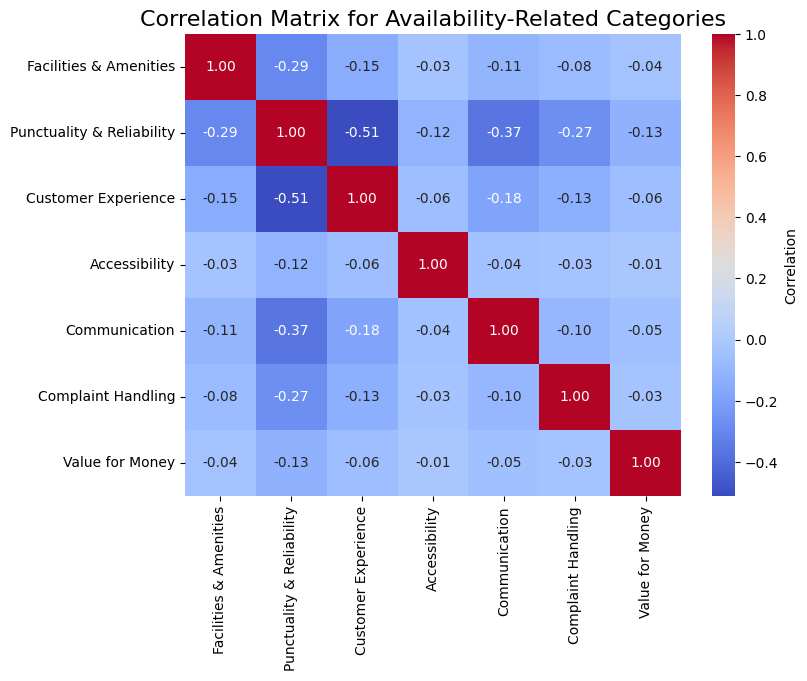

In [6]:
# Correlation between Punctuality & Reliability and other categories
correlation_matrix = data.iloc[:, 3:10].corr()
availability_correlation = correlation_matrix['Punctuality & Reliability'].sort_values(ascending=False)

print("Correlation with Punctuality & Reliability:\n", availability_correlation)

# Visualization: Heatmap for Correlation
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix for Availability-Related Categories', fontsize=16)
plt.show()

Sarcastic Complaint Rate for Availability: 6.47%


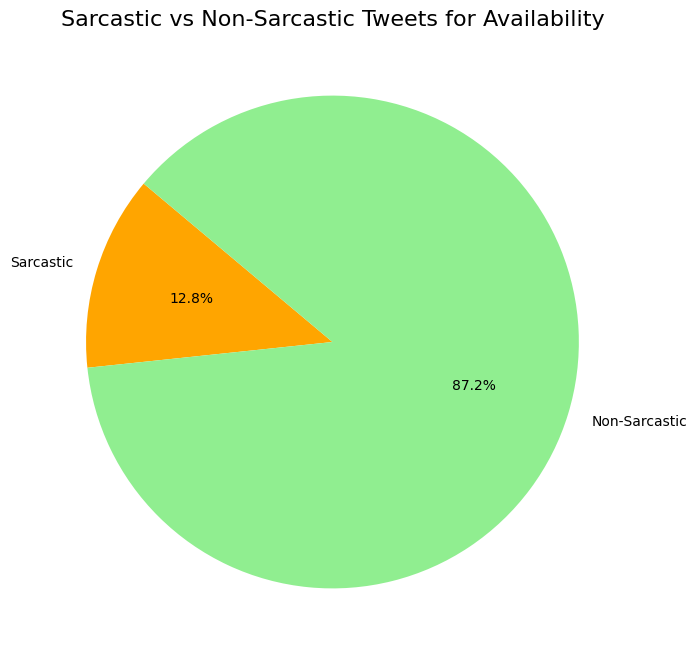

In [7]:
# Sarcastic Complaint Rate for Availability
sarcastic_complaint_rate_availability = (sarcastic_availability / len(data)) * 100

print("Sarcastic Complaint Rate for Availability: {:.2f}%".format(sarcastic_complaint_rate_availability))

# Visualization: Pie Chart for Sarcastic vs Non-Sarcastic
plt.figure(figsize=(8, 8))
plt.pie([sarcastic_availability, non_sarcastic_availability],
        labels=['Sarcastic', 'Non-Sarcastic'], autopct='%1.1f%%',
        startangle=140, colors=['orange', 'lightgreen'])
plt.title('Sarcastic vs Non-Sarcastic Tweets for Availability', fontsize=16)
plt.show()

Priority Score for Improving Availability: 8866


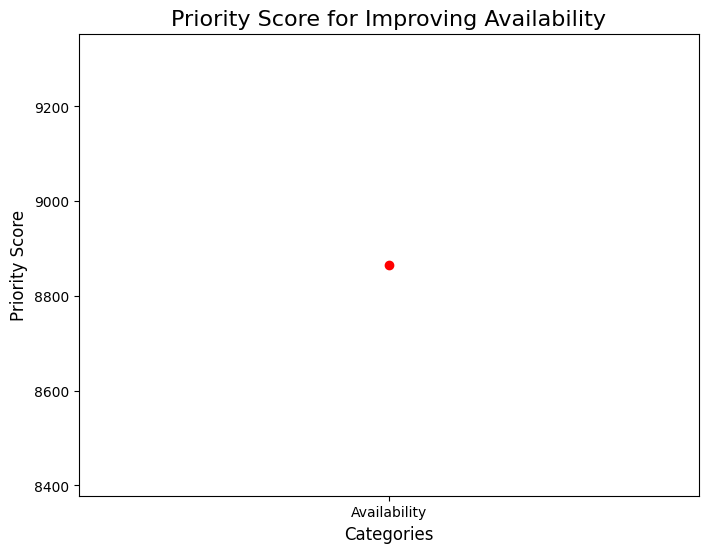

In [8]:
# Priority Score for Availability
priority_score_availability = sarcastic_availability + non_sarcastic_availability

print("Priority Score for Improving Availability:", priority_score_availability)

# Visualization: Line Chart for Priority Score
plt.figure(figsize=(8, 6))
plt.plot(['Availability'], [priority_score_availability], marker='o', linestyle='-', color='red')
plt.title('Priority Score for Improving Availability', fontsize=16)
plt.ylabel('Priority Score', fontsize=12)
plt.xlabel('Categories', fontsize=12)
plt.show()